In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Discrete Fourier Transform (DFT) example 

The DFT is applied to a dataseries - a series of regularly spaced datapoints. In this example the data is sampled from the function $y = 3.5 \times \sin \left ( \pi(x-3)\right ) +  1.5\times\sin \left (3\pi(x+7) \right ) + \sin \left ( 4\pi x\right )$. The sampling is from $x=-10$ to $x=9.9$ with an interval of $\Delta x = 0.1$, leading to a total dataseries length of $N=200$.    

We'll start by reading in the data.

In [2]:
df_dft = pd.read_csv('../Data/discrete_fourier_transform_data.csv')

A look at the dataframe, shows that we have two columns of data, the x-values and the value of the function (the y-values) corresponding to those x-values. For the DFT we only need the y-values. 

In [3]:
df_dft.head()

,x,y
0,-10.0,1.010775e-14
1,-9.9,-1.344028e+00
2,-9.8,-2.896048e+00
3,-9.7,-3.882870e+00
4,-9.6,-3.398076e+00


In [4]:
df_dft.tail()

,x,y
195,9.5,2.000000
196,9.6,3.398076
197,9.7,3.882870
198,9.8,2.896048
199,9.9,1.344028


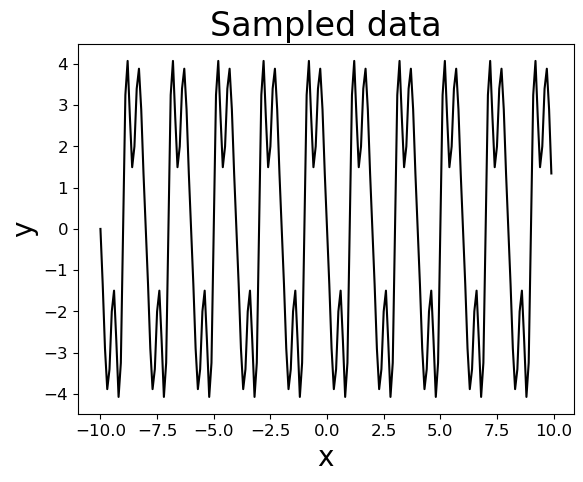

In [5]:
# Plot of the data to which we will apply the DFT
plt.plot(df_dft.x, df_dft.y, 'black')
plt.title('Sampled data', fontsize=24)
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

To calculate the DFT we pass a numpy array into the numpy FFT function, which we call using numpy.fft.fft . FFT stands for Fast Fourier Transform, which is a computationally efficient method for computing the Discrete Fourier Transform of a dataseries.

In [6]:
dft_y = np.fft.fft(df_dft['y'].to_numpy())

We'll calculate the absolute values (modulus) of the DFT values to get a real-valued measure of how much of each wavenumber is present in our data series. We are only expecting to see three waves present.

In [7]:
# Take modulus of amplitudes
dft_amplitudes = np.absolute(dft_y)

If we plot those absolute amplitudes we see six spikes. This is because for every wavenumber $k$ present in the data, we also expect to see a spike at $N-k$. Some we expect to see a symmetric pattern of spikes, symmetric about $N/2$.

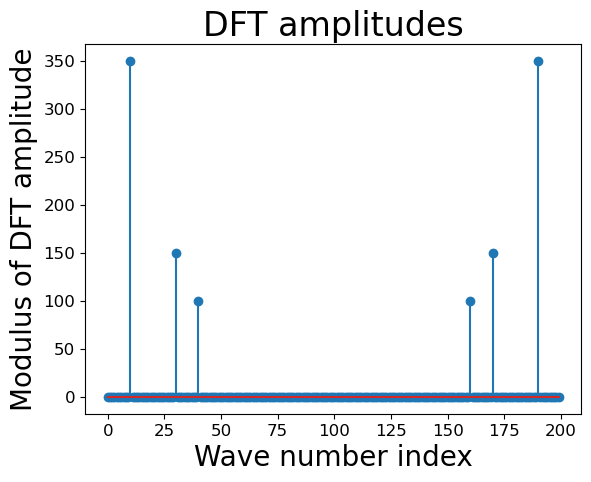

In [8]:
# Plot the modulus of the amplitudes
plt.stem(dft_amplitudes)
plt.title('DFT amplitudes', fontsize=24)
plt.xlabel('Wave number index', fontsize=20)
plt.ylabel('Modulus of DFT amplitude', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

If we look at the array of amplitude values we can see where precisely those spikes are.

In [9]:
# List the array of amplitudes
dft_amplitudes

array([1.82534109e-13, 1.59335018e-13, 1.78338933e-13, 5.51364850e-14,
       2.72378025e-13, 1.01860332e-13, 1.38216679e-13, 1.80841569e-13,
       5.08502317e-14, 9.07781498e-14, 3.50000000e+02, 2.20962700e-13,
       1.35947662e-13, 1.44396764e-13, 2.05024906e-13, 2.04279253e-13,
       1.66441815e-13, 1.35978229e-13, 2.17733217e-14, 8.71187798e-14,
       3.29379359e-14, 5.30391239e-14, 5.28764250e-14, 1.35820496e-14,
       1.15095043e-13, 1.67551183e-14, 1.33703056e-13, 4.82936399e-14,
       1.59929053e-13, 1.23660025e-13, 1.50000000e+02, 6.39002128e-14,
       2.27293799e-13, 7.40556626e-14, 1.21186952e-13, 1.24342434e-13,
       9.93697521e-14, 5.69022965e-14, 2.47317717e-14, 1.40470020e-13,
       1.00000000e+02, 2.23791056e-13, 1.49872497e-13, 1.28398478e-13,
       6.70344407e-14, 1.65451778e-13, 7.36292606e-14, 2.21048631e-13,
       1.15739051e-13, 3.99067185e-14, 3.35939198e-13, 4.49190640e-13,
       1.03316240e-13, 1.12202848e-13, 6.70337737e-14, 4.38100100e-14,
      

The first three spikes are at index values of k=10,30,40. Since the dataseries spans the interval from $x=-10$ to $x=9.9$, i.e a gap of $19.9$ in $N=200$ observations, the spikes correspond to period of lengh $L = 2 \times (N-1)/(k\times 19.9)$. Thus the first three spikes correspond to periods of $\frac{2\times199}{10\times 19.9} = 2, \frac{2\times199}{30\times 19.9} = \frac{2}{3}$, and $\frac{2\times199}{40\times 19.9} = \frac{2}{4}$, in agreement with our starting equation for $y$. 

Since our dataseries $y$ consists entirely of real values, we can make use of that and calculate the Real Discrete Fourier Transform. The Real DFT effectively combines each spike with its symmetric counterpart when calculating its amplitudes, as this guarantees that we will get a real series back when we calculate the inverse real DFT. Fortunately, numpy has a real DFT function as well. To use it, we just call numpy.fft.rfft . Let's do so. 

In [10]:
# Calculate the real DFT
real_dft_y = np.fft.rfft(df_dft['y'].to_numpy())

Let's look at the real DFT values. We'll calculate the absolute value again and plot.

In [11]:
# Look at the real DFT values just calculated
real_dft_y 

array([-1.82110241e-13+0.00000000e+00j,  7.75559846e-14+1.40053212e-13j,
       -1.26588458e-13+1.24827907e-13j, -2.94790544e-14+4.65376575e-14j,
       -6.03010043e-14-2.67828449e-13j,  5.11358008e-14-7.92111610e-14j,
       -7.33171239e-14-1.11014497e-13j,  1.32888638e-13+1.23857784e-13j,
       -3.22377616e-14-3.98840597e-14j, -6.10516629e-14-6.43254208e-14j,
       -6.65835447e-13+3.50000000e+02j, -1.02584162e-14-2.22781288e-13j,
        3.95401200e-14-1.27778946e-13j,  4.19610653e-14-1.37114773e-13j,
        2.14892995e-13+1.95998950e-15j,  2.15953272e-13+1.68693030e-14j,
        4.42384794e-14+1.57676633e-13j,  1.27958885e-13-4.54315832e-14j,
        2.73210280e-14-4.99882316e-17j,  7.03164119e-14-5.28649888e-14j,
       -1.87048904e-14+1.03103888e-14j,  2.32155032e-14+4.56390099e-14j,
       -2.98960890e-14+5.88655642e-14j,  8.38158414e-15-1.03955295e-14j,
       -1.17601768e-13-1.28296353e-14j, -1.62995052e-14+3.39584049e-15j,
       -1.01137585e-13+6.28405935e-14j,  4.87263632

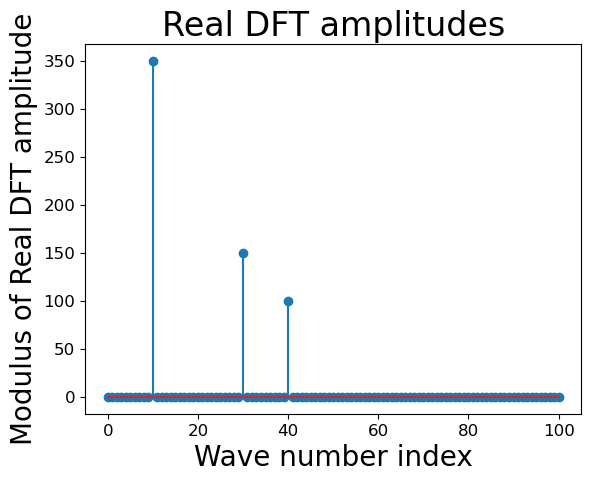

In [12]:
# We'll calculate the modulus of the real DFT coefficients and plot them
real_dft_amplitudes = np.absolute(real_dft_y)

# Plot amplitudes
plt.stem(real_dft_amplitudes)
plt.title('Real DFT amplitudes', fontsize=24)
plt.xlabel('Wave number index', fontsize=20)
plt.ylabel('Modulus of Real DFT amplitude', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()